In [26]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
rcParams["figure.figsize"]=(18,5)

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


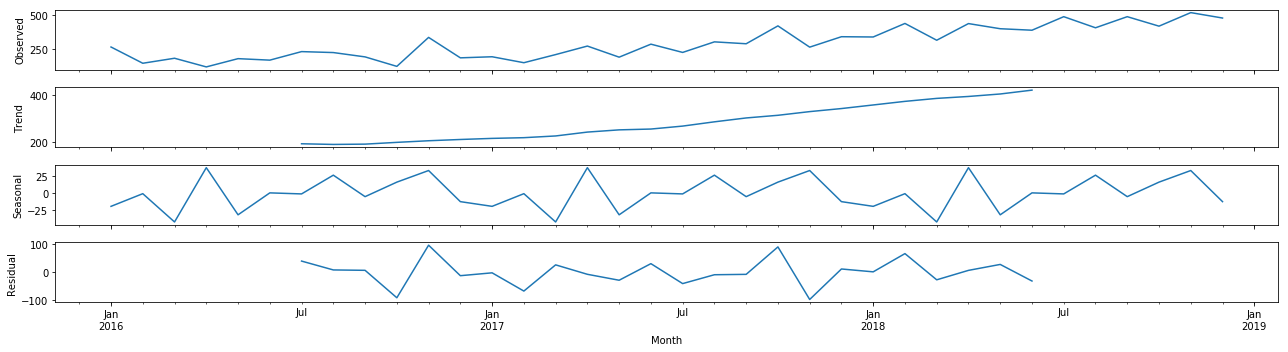

In [27]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(sales, model='additive')
fig = decomposition.plot()
plt.show()

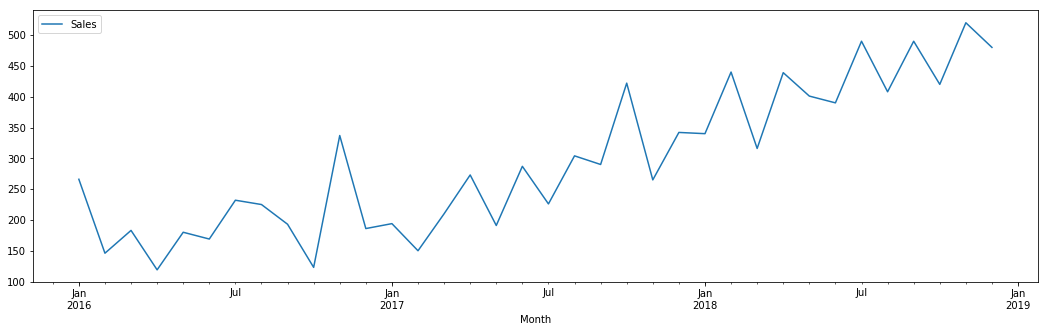

In [28]:
sales.plot()

In [29]:
def test_stationarity(timeseries):
    
    #rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #rolling statistics
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #dickeyfuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


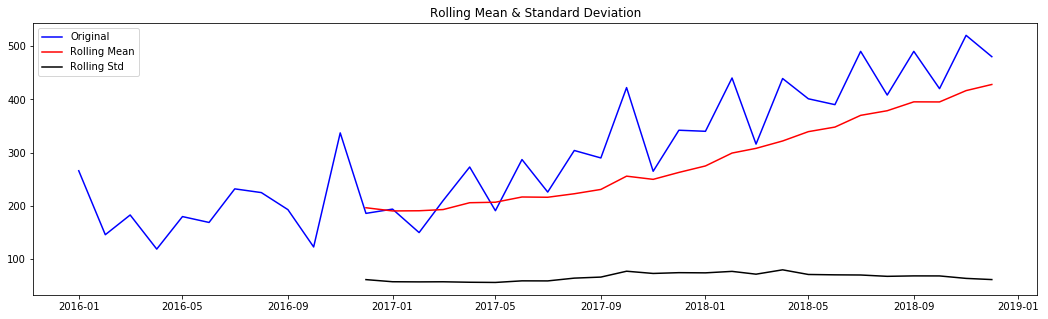

Results of Dickey Fuller Test:
Test Statistic                  1.636883
p-value                         0.997964
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [30]:
test_stationarity(sales)

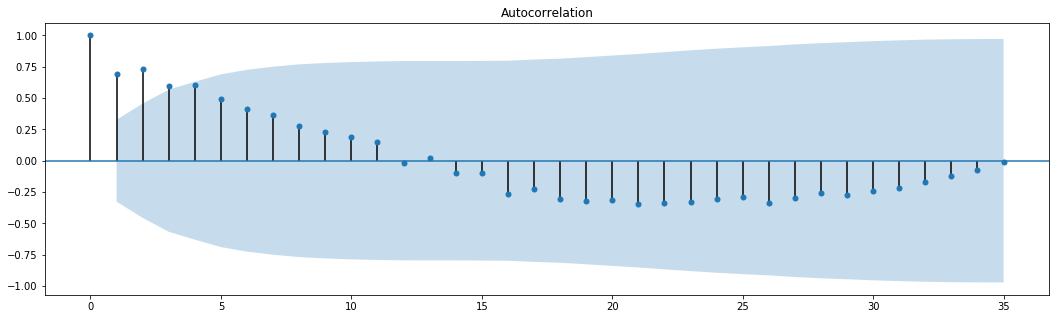

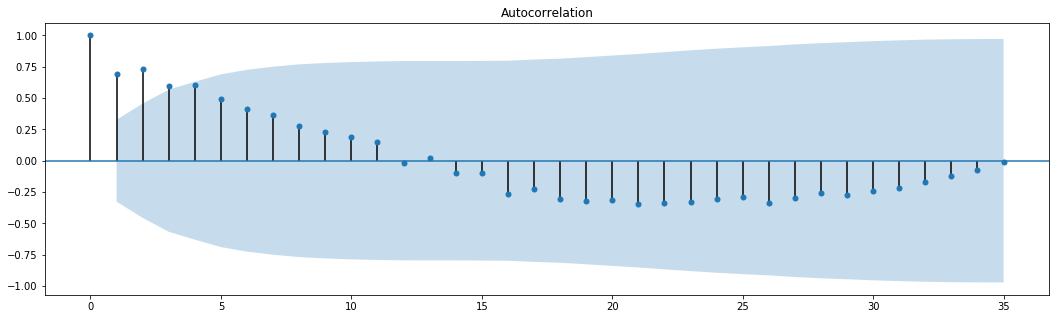

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [9]:
sales_diff = sales.diff(periods=1)# integrated order 1


In [10]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


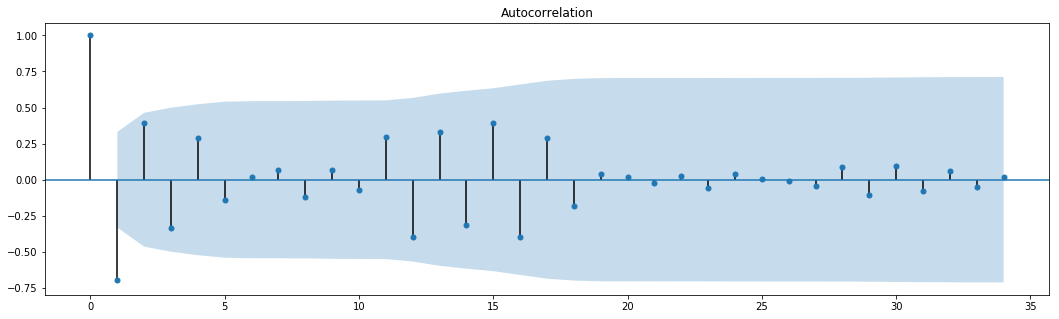

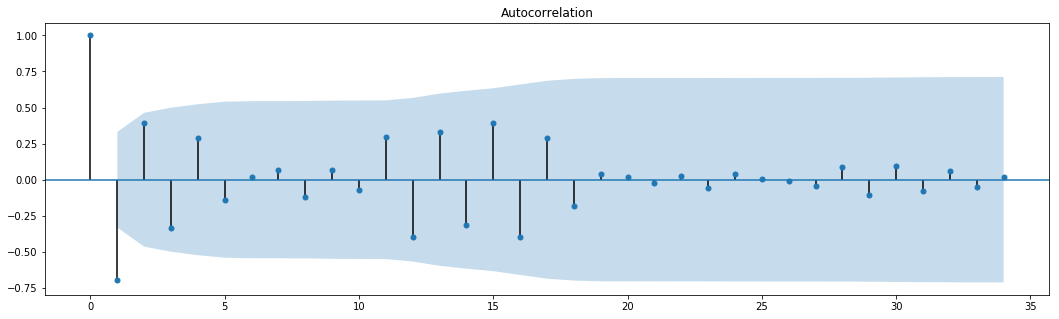

In [32]:
plot_acf(sales_diff)

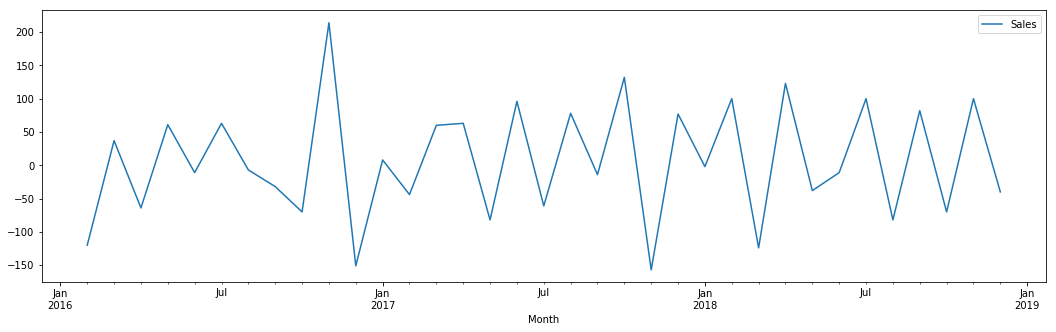

In [33]:
sales_diff.plot()

In [13]:
X = sales.values
train = X[0:27] # 27 
test = X[26:]  # 9 
predictions = []

In [14]:
train

array([[266],
       [146],
       [183],
       [119],
       [180],
       [169],
       [232],
       [225],
       [193],
       [123],
       [337],
       [186],
       [194],
       [150],
       [210],
       [273],
       [191],
       [287],
       [226],
       [304],
       [290],
       [422],
       [265],
       [342],
       [340],
       [440],
       [316]], dtype=int64)

# ARIMA model

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
#finding lowest aic to find the best pdq values 
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
import warnings
warnings.filterwarnings('ignore')
min=99999
max=0
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        model_aic=model_arima_fit.aic
        print(param,model_aic)
        if model_aic >= max:
            max=model_aic
            max_param=param
        if model_aic <= min:
            min=model_aic
            min_param=param
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 0, 5) nan
(0, 0, 7) 312.8727661954332
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.16687175343054
(1, 0, 2) 310.97906422264316
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584986
(1, 1, 2) 299.4716667063295
(1, 1, 3) 301.28511809477334
(1, 1, 4) 299.97873239729927
(1, 2, 0) 306.5307767571543
(1, 2, 5) 294.6437482047728
(2, 0, 0) 310.99695736763897
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.99999301674126
(2, 1, 2) 298.55054281302256
(2, 1, 3) 302.87208243829116
(2, 1, 5) 296.364010196169
(2, 2, 0) 306.2975856432374
(2, 2, 5) 312.97553872743504
(3, 0, 0) 312.98385874204837
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.99793534183914
(3, 1, 2) 292.6686238693939
(3, 1, 3) 294.65889075168616
(3, 1, 5) 298.36261650490866
(3, 2, 0) 299.407586815627
(3, 2, 

In [17]:
model_arima = ARIMA(train,order=max_param) #min_param)#(9, 2, 0))
model_arima_fit = model_arima.fit()
print(max_param,model_arima_fit.aic)

(8, 2, 2) 330.68764210719934


In [18]:
predictions= model_arima_fit.forecast(steps=21)[0]
predictions

array([390.67000575, 395.08619807, 429.14634791, 363.50833464,
       491.07186942, 405.72227585, 450.55293915, 423.51738127,
       556.38307842, 433.79091661, 491.35363086, 504.93157578,
       575.77787981, 472.54676838, 581.1258958 , 555.32903987,
       595.96990906, 528.79685849, 675.71490589, 591.48842483,
       627.1348263 ])

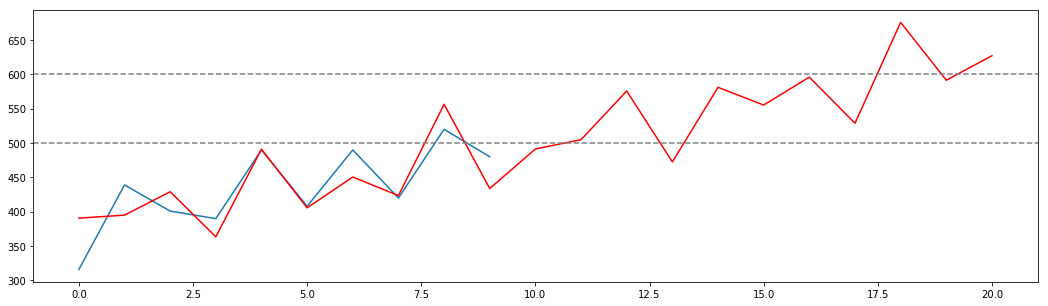

In [34]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.axhline(500,linestyle="--",color='grey')
plt.axhline(600,linestyle="--",color='grey')

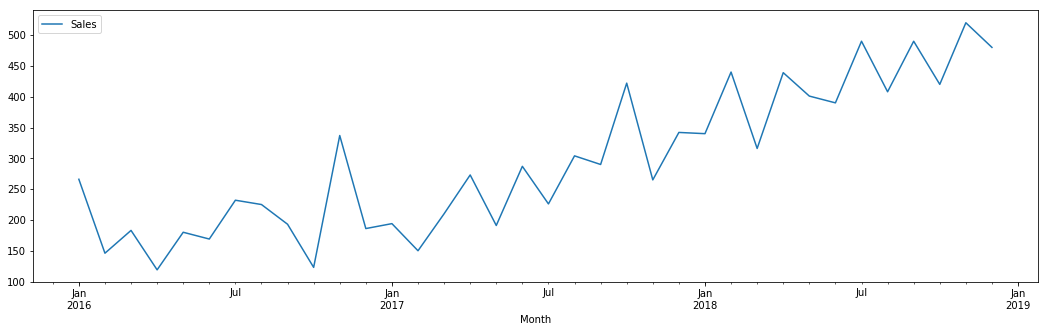

In [35]:
sales.plot()

In [39]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,predictions)#used when same test and predict conditions

In [67]:
err=(mse)**(0.5)
print("RootMeanSquaredError = ",err)

RootMeanSquaredError =  37.45910341610176


# SARIMA model

In [48]:
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
pdq = list(itertools.product(P, D, Q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
min=99999
max=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            model_aic=results.aic
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_aic))
            if model_aic >= max:
                max=model_aic
                max_param=param
                max_seasonal_param=param_seasonal
            if model_aic <= min and model_aic>=0:
                min=model_aic
                min_param=param
                min_seasonal_param=param_seasonal
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:504.9118150357126
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:300.2481991803455
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:301.8354755365414
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:162.4688852931865
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:466.0034280031835
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:287.40475338909414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:302.24969788813235
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:161.28163323050202
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:401.64151340427594
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:287.41296992776114
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:263.38957292526095
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:137.9671144915926
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:374.32027259720087
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:260.971549059065
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:257.989753999478
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:129.55764032865017
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:416.20333194566376
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:295.3836800029776
ARI

(1, 1, 1) (1, 1, 0, 12) 102.41775104499675
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7354      0.266     -2.760      0.006      -1.258      -0.213
ma.L1         -1.0000      0.854     -1.170      0.242      -2.674       0.674
ar.S.L12      -0.5505      0.232     -2.368      0.018      -1.006      -0.095
sigma2       587.9231      0.001   4.05e+05      0.000     587.920     587.926


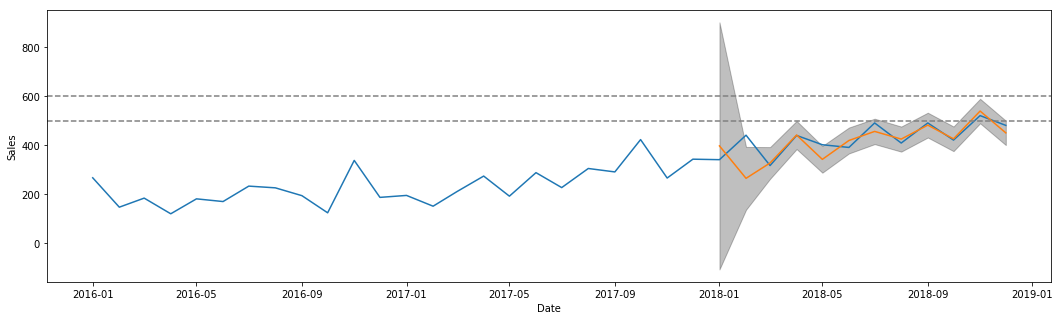

In [49]:
mod = sm.tsa.statespace.SARIMAX(sales,order=min_param,seasonal_order=min_seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
model_aic=results.aic
print(min_param,min_seasonal_param,model_aic)
print(results.summary().tables[1])
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = plt.axes()
ax.plot(sales,label='original')
ax.plot(pred.predicted_mean, label='predicted',)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.axhline(500,linestyle="--",color='grey')
plt.axhline(600,linestyle="--",color='grey')


In [59]:
y_forecasted = pred.predicted_mean
y_truth = sales['2018-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
Sales                 NaN
dtype: float64


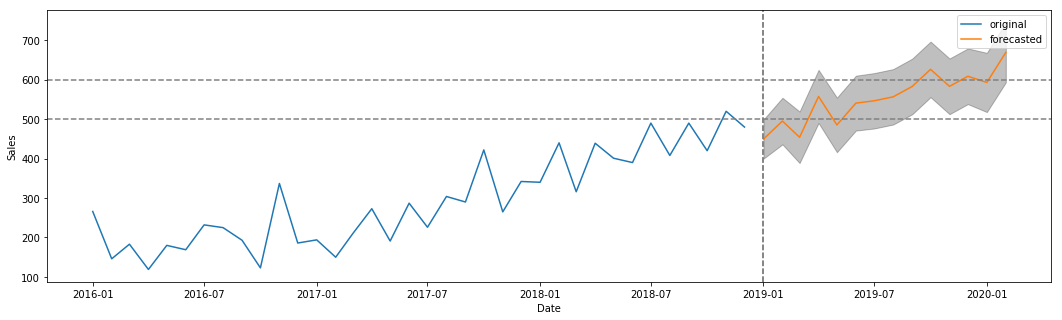

In [55]:
pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = plt.axes()
ax.plot(sales,label='original')
ax.plot(pred_uc.predicted_mean, label='forecasted',)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.axhline(500,linestyle="--",color='grey')
plt.axhline(600,linestyle="--",color='grey')
import datetime as dt
plt.axvline(dt.datetime(2019, 1, 1),linestyle="--",color='grey')
plt.axvline(dt.datetime(2019, 1, 1),linestyle="--",color='grey')
plt.legend()
plt.show()